# SMS Spam Detection Using NLP and Machine Learning

- In this project, we aim to classify SMS messages into two categories: Ham (legitimate messages) and Spam (unwanted or malicious messages). The dataset used consists of SMS messages labeled as either "ham" or "spam". The objective is to build a machine learning model using Natural Language Processing (NLP) to automatically detect spam messages.

- We will be using a pre-trained transformer model from the Hugging Face library, distilbert-base-uncased, to classify the SMS messages. The process involves tokenizing the text, training a model, evaluating its performance, and visualizing the results.

## Project Outline
- **Importing Libraries**: Loading necessary libraries and setting up the environment.

- **Loading Data**: Loading the SMS spam dataset and performing some basic preprocessing.

- **Exploratory Data Analysis (EDA)**: Visualizing data distributions and exploring the content of messages.

- **Model Preparation**: Tokenizing text and setting up a transformer-based classification model.

- **Training the Model**: Training the classification model and evaluating it on a test set.

- **Results Visualization**: Presenting the results using confusion matrices and performance metrics.

- **Testing with New Data**: Testing the model with new, unseen messages to predict whether they are spam or ham.

- **Saving the Model**: Saving the trained model for future use.

In this notebook, we have used transformers from Hugging Face, which includes a pre-trained DistilBERT model for text classification. The key steps are:

- **Data Loading**: Load the dataset and preprocess it by converting the labels (ham and spam) into numerical values.

- **Exploratory Data Analysis (EDA)**: Analyze the distribution of message lengths and the frequency of "ham" vs "spam" messages.

- **Model Preparation**: We initialize the tokenizer and pre-trained DistilBERT model. Tokenization involves converting text into a format that the model can process.

- **Training and Evaluation**: Using Hugging Face’s Trainer API, we set up the model to train on the SMS messages. After training, we evaluate its performance using accuracy and visualize the results through confusion matrices.

- **Visualization**: After training, the loss and accuracy during training and evaluation are visualized. Confusion matrices show the model's ability to distinguish between "ham" and "spam" messages.

- **Testing with New Data**: Finally, we test the model on new SMS messages to predict whether they are spam or not.

## Comparison Between "Ham" and "Spam"¶

In SMS communication, messages can be classified into two main categories: Ham (legitimate) and Spam (unwanted or malicious). Understanding the distinction between these two types of messages is crucial for developing a robust spam detection system.

1. What is "Ham"?

**Definition**: "Ham" refers to legitimate messages that are not spam. These are typically desired by the recipient.

**Characteristics**:

**Relevant**: Contains information pertinent to the recipient.
**Non-Intrusive**: Doesn't disrupt the user's experience.
**Consent-Based**: Sent with the recipient's consent or expectation.

**Examples**:
- Personal communications between friends and family.
- Transactional messages like order confirmations or appointment reminders.
- Service updates from subscribed services.

2. What is "Spam"?

**Definition**: "Spam" refers to unsolicited or unwanted messages, often sent in bulk. These messages can be intrusive and sometimes harmful.

**Characteristics**:

**Unsolicited**: Sent without the recipient’s consent.
**Irrelevant**: Contains irrelevant information to the recipient.
**Potentially Harmful**: May include phishing attempts, malicious links, or scams.

**Examples**:
- Unsolicited advertisements or promotional messages.
- Phishing attempts that try to trick recipients into giving personal information.
- Messages containing malicious links.

## Importance of Distinguishing Between "Ham" and "Spam"

**User Satisfaction**: Proper filtering ensures that only relevant and desired messages reach users.

**Security**: Blocking spam messages, especially those containing phishing attempts or malware, enhances user security.

**Efficiency**: Reducing spam improves the user's experience by decluttering their inbox.

**Resource Management**: Managing spam helps to minimize the overuse of network resources by preventing unnecessary transmission of messages.

## Conclusion¶

By distinguishing between ham and spam, we ensure that the integrity and security of communication channels are maintained. This classification helps improve user experience and prevents malicious activities. The model developed in this project uses NLP to effectively detect and classify spam messages, helping to create a more efficient messaging environment.

In [1]:
import numpy as np 
import pandas as pd 
import evaluate 
import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)
import torch 
import os 
import random 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import classification_report 
from wordcloud import WordCloud 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from datasets import Dataset 
from transformers import (AutoTokenizer, AutoModelForSequenceClassification, Trainer,  TrainingArguments)


c:\Users\X\.conda\envs\ML3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)
set_seed(42)

**Function Purpose** The set_seed function is designed to set the random seed for various libraries used in machine learning and deep learning, ensuring reproducibility of results.

1. **random.seed(seed)**: Sets the random seed for Python's built-in random module. This ensures that the random numbers generated by random are reproducible.

2. **np.random.seed(seed)**: Sets the random seed for NumPy's random module. This is necessary because NumPy has its own random number generator, which needs to be seeded separately.

3. **torch.manual_seed(seed)**: Sets the random seed for PyTorch's CPU-based random number generator. This ensures that PyTorch's tensor operations are reproducible.

4. **if torch.cuda.is_available()**: torch.cuda.manual_seed_all(seed): If a CUDA device (i.e., an NVIDIA GPU) is available, sets the random seed for PyTorch's CUDA-based random number generator. This ensures that PyTorch's GPU-based tensor operations are reproducible.

- > In the context of random number generation, a seed is a value that is used to initialize a **pseudorandom number generator** (PRNG). The seed value determines the sequence of random numbers that will be generated by the PRNG.

In [3]:
df = pd.read_csv("Spam_SMS.csv")

In [4]:
df['Label'] = df['Class'].map({'ham': 0, "spam": 1})
df = df[['Message', 'Label']]

In [5]:
df.head()

,Message,Label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


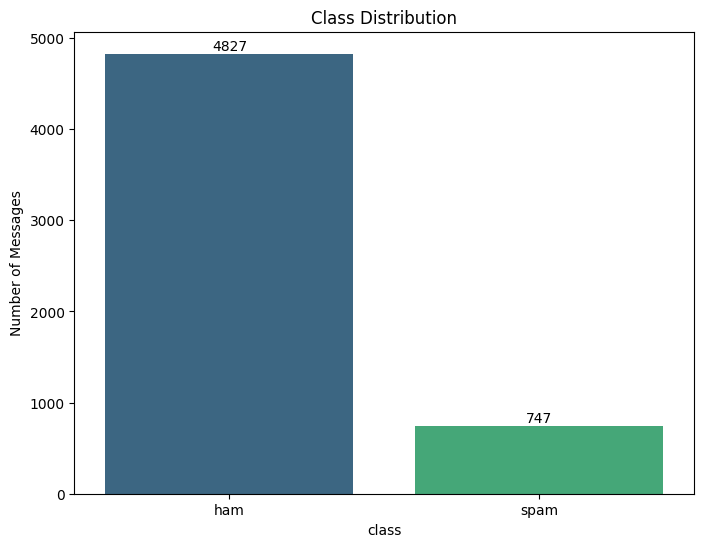

In [6]:
label = df['Label'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=label.index, y=label.values, palette='viridis')
for i, count in enumerate(label.values):
    plt.annotate(str(count), xy=(i, count), ha='center', va='bottom')
    
plt.title("Class Distribution")
plt.xlabel("class")
plt.ylabel("Number of Messages")
plt.xticks([0,1], ['ham', 'spam'])
plt.show()



In [7]:
df['message_length'] = df['Message'].apply(len)
df.head()

,Message,Label,message_length
0,"Go until jurong point, crazy.. Available only ...",0,111
1,Ok lar... Joking wif u oni...,0,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,U dun say so early hor... U c already then say...,0,49
4,"Nah I don't think he goes to usf, he lives aro...",0,61


> Message Length Distribution

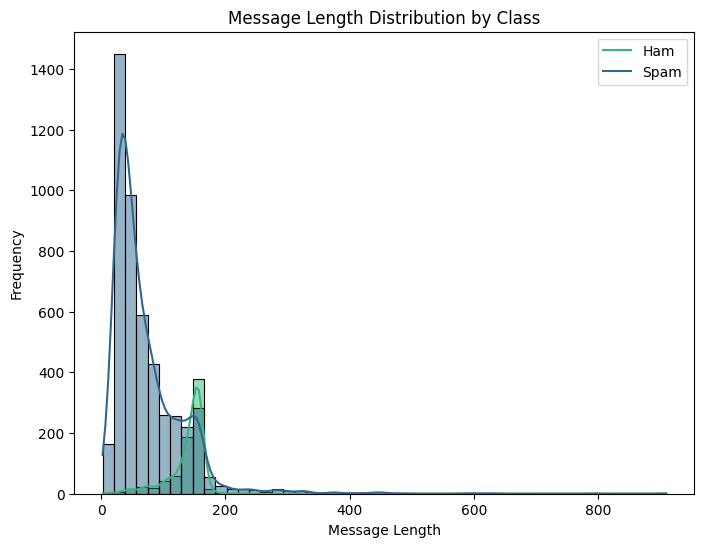

In [8]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='message_length', hue='Label', bins=50, kde=True,  palette='viridis')
plt.title('Message Length Distribution by Class')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.legend(['Ham', 'Spam'])
plt.show()


### > WordCloud for ham and spam messages.

In [9]:
ham_words = ' '.join(df[df['Label'] == 0]['Message'])
ham_words

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar... Joking wif u oni... U dun say so early hor... U c already then say... Nah I don\'t think he goes to usf, he lives around here though Even my brother is not like to speak with me. They treat me like aids patent. As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune I\'m gonna be home soon and i don\'t want to talk about this stuff anymore tonight, k? I\'ve cried enough today. I\'ve been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times. I HAVE A DATE ON SUNDAY WITH WILL!! Oh k...i\'m watching here:) Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet. Fine if that’s the way u feel. That’s the way 

> This code creates a string `ham_words` that contains all the words from the messages labeled as `"ham"` (non-spam) in the dataset df.

Text(0.5, 1.0, 'Ham messages wordcloud')

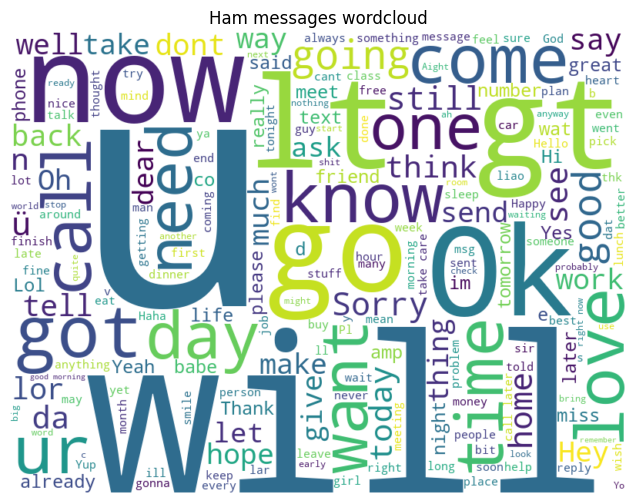

In [10]:
wordcloud_ham = WordCloud(width=800, height=600, background_color='white').generate(ham_words)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.axis('off')
plt.title("Ham messages wordcloud")

Text(0.5, 1.0, 'Spam messages wordcloud')

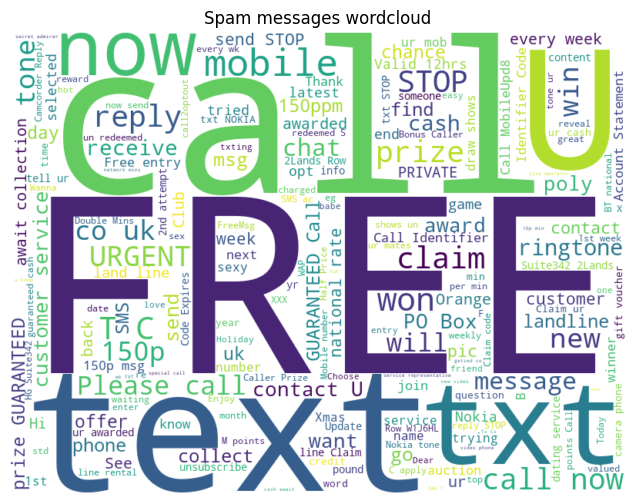

In [11]:
spam_words = ' '.join(df[df['Label'] == 1]['Message'])
wordcloud_spam = WordCloud(width=800, height=600, background_color='white').generate(spam_words)
plt.figure(figsize=(8,6))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis('off')
plt.title("Spam messages wordcloud")

## Train-Test  Split

In [12]:
train_texts, test_texts, train_labels, test_labels = train_test_split(df['Message'].tolist(),
                                                                      df['Label'].tolist(),
                                                                      test_size=0.2,
                                                                      random_state=42)

train_dataset = Dataset.from_dict({'text': train_texts,  'label': train_labels})
test_dataset  = Dataset.from_dict({'text':  test_texts,  'label': test_labels})


## Tokenizer and Model Initialization

In [13]:
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')
#The from_pretrained method is used to load a pre-trained tokenizer model. In this case, we are loading the distilbert-base-uncased tokenizer, which is a variant of the BERT (Bidirectional Encoder Representations from Transformers) model. 

model = AutoModelForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)
#The num_labels parameter is set to 2, which indicates that we are dealing with a binary classification problem

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In summary, these two lines of code load a pre-trained tokenizer and model, both based on the DistilBERT architecture, to perform sequence classification tasks with binary labels.

## Preprocessing with Tokenizer.

In [14]:
def preprocess_function(examples):
    return tokenizer(examples['text'], truncation=True, padding=True)

train_dataset = train_dataset.map(preprocess_function, batched=True)
test_dataset = test_dataset.map(preprocess_function, batched=True)

Map: 100%|██████████| 1115/1115 [00:00<00:00, 5492.53 examples/s]


- The truncation=True parameter ensures that any input sequences longer than the maximum allowed length (which is typically 512 tokens for BERT-based models) are truncated to fit within that limit.

- The padding=True parameter ensures that any input sequences shorter than the maximum allowed length are padded with special tokens to make them the same length. This is necessary because many neural network models require input sequences to be the same length.

## Training Arguments

In [15]:
training_args = TrainingArguments(
    output_dir='./results', #This specifies the directory where the model's output will be saved.
    eval_strategy='epoch', #This specifies when to evaluate the model.
    save_strategy='epoch', #This specifies when to save the model.
    learning_rate=2e-5, # This specifies the learning rate for the optimizer.
    per_device_train_batch_size=16, #These specify the batch sizes for training and evaluation.
    per_device_eval_batch_size=16, 
    num_train_epochs=3,#This specifies the number of epochs to train the model for.
    weight_decay=0.01, #This specifies the weight decay rate for the optimizer.
    logging_dir='./logs', #This specifies the directory where the training logs will be saved.
    logging_steps=10, #This specifies how often to log the training metrics.
    load_best_model_at_end=True, #This specifies whether to load the best model at the end of training.
    report_to=None) #This specifies where to report the training metrics.

When fine-tuning a model with the Trainer API in Hugging Face Transformers, you need to define a TrainingArguments class that contains all the hyperparameters the Trainer will use for training.

## Evaluation Metrics

In [16]:
metric = evaluate.load("accuracy")
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(-1)
    return metric.compute(predictions=predictions, references=labels)

We're defining a custom metric computation function called compute_metrics. This function takes in eval_pred, which is a tuple containing the model's output logits and the true labels.

1. **Unpack the logits and labels**: We unpack the eval_pred tuple into logits and labels.

2. **Make predictions**: We use the argmax function to convert the logits into predictions. This gives us the class with the highest probability.

3. **Compute the accuracy metric**: We pass the predictions and labels to the metric.compute function, which computes the accuracy metric.

## Initialize the Trainer

In [17]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

## Train the Model

In [ ]:
trainer.train()
eval_results = trainer.evaluate()
print(f"Accuracy: {eval_results['eval_accuracy'] * 100:.2f}%")

In [ ]:
predictions = trainer.predict(test_dataset)

preds = np.argmax(predictions.predictions, axis=1)
labels = predictions.labels_ids

print(classification_report(labels, preds,target_names=['Ham', 'Spam']))

## Confusion Matrix And Classification Report

In [ ]:
predictions = trainer.predict(test_dataset)
preds = np.argmax(predictions.predictions)
labels = predictions.label_ids

cm = confusion_matrix(labels, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
plt.figure(figsize=(8,6))
disp.plot(cmap='Blue', values_format='d')
plt.title('Confusion Matrix')
plt.show()

cm_normalized = confusion_matrix(labels, preds, normalize=True)
disp_normaized = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=['Ham', 'Spam'])
plt.figure(figsize=(6,5))
disp_normalized.plot(cmap='Blues', values_format='.2f')
plt.title('Normalized Confusion Matrix')
plt.show()
